# This notebook shows an example to read the standard output and plot desired values

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

from matplotlib import rc
rc('text', usetex=True)

In [2]:
plt.tight_layout()
def plot_line(obj_dict, fname='', ylabel = '', legend=True):
    line_opt=dict(linewidth=3, markersize=12)
    fig = plt.figure(figsize=(10, 10))
    axes = fig.add_subplot(1, 1, 1)
    marker_list=["o", "v", "s", "D", "x", "*"]
    
#     axes.set_xlim(xmin * inc_factor, xmax * inc_factor)
#     axes.set_ylim(-1, 13)
#     axes.set_xlim(-1, len(x))
#     axes.set_yscale("log")
    
    axes.spines['right'].set_color('black')
    axes.spines['top'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_color('black')
    
    axes.spines['right'].set_linewidth(3)
    axes.spines['top'].set_linewidth(3)
    axes.spines['left'].set_linewidth(3)
    axes.spines['bottom'].set_linewidth(3)
    
    axes.tick_params(labelsize=20)

    for i, key in enumerate(obj_dict):
        name = key
        axes.plot(range(len(obj_dict[key])), 
                  obj_dict[key], 
                  label=name, **line_opt,
                  marker=marker_list[i]) 
#     axes.legend(loc='upper right', prop={'size': 20})
    axes.legend(prop={'size': 20})
    axes.set_xlabel('epoch', fontsize=25)
    axes.set_ylabel(ylabel, fontsize=25)
    
    if fname != '':
        fig.savefig(fname, bbox_inches='tight')
    
    plt.show()

<Figure size 432x288 with 0 Axes>

In [3]:
def read_file(fname):
    flag = False
    start = True
    kl = [0]
    mi = [0]
    kl_aggr = [0]
    with open(fname) as fin:
        for line in fin:
            if line.startswith("update best loss"):
                kl += [kl_val]
                mi += [mi_val]
                kl_aggr += [max(kl_val - mi_val, 0)]
                
            if line.startswith("VAL"):
                id_kl = line.find("kl")
                id_kl_end = line.find(", mi")
                id_mi = line.find("mi")
                id_mi_end = line.find(", recon")
                kl_val = float(line[id_kl+4:id_kl_end])
                mi_val = float(line[id_mi+4:id_mi_end])
                if mi_val < 0:
                    mi_val = 0
                    
    return kl, mi, kl_aggr

In [4]:
our_data = {}
KL_name = r"$D_{KL}(q_\phi(z | x) || p(z))$"
MI_name = r"$I_q$"
KL_aggr_name = r"$D_{KL}(q_\phi(z) \| p(z))$"
our_data[KL_name], our_data[MI_name], our_data[KL_aggr_name] = read_file("example.out")

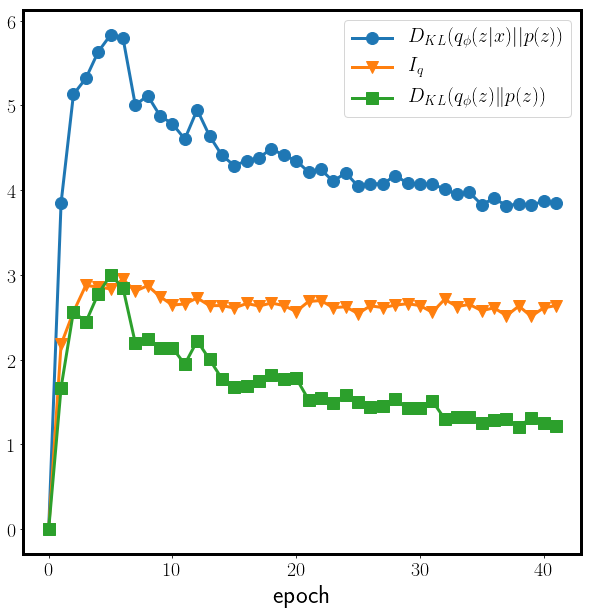

In [5]:
plot_line(our_data, fname='example.pdf', legend=True)